<a href="https://colab.research.google.com/github/manisha-mishra-123/Scaler-projects/blob/main/Walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

!gdown 1Wbm2pJBAdcIHksyWkv2ZDndU3-ZOxtIw

Downloading...
From: https://drive.google.com/uc?id=1Wbm2pJBAdcIHksyWkv2ZDndU3-ZOxtIw
To: /content/Walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 77.6MB/s]


In [4]:
df=pd.read_csv('Walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Characteristics of the Dataset

In [5]:
print('Shape of the dataset:', df.shape)
print('Size of the dataset:',df.size)
print('Information of the columns of the dataset:\n',df.info())
print('Description of the columns of the dataset:\n',df.describe())

Shape of the dataset: (550068, 10)
Size of the dataset: 5500680
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
Information of the columns of the dataset:
 None
Description of the columns of the dataset

Detecting Null values and outliers

In [6]:
print('Null values:\n', df.isnull())
df.isnull().sum()

Null values:
         User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
...         ...         ...     ...    ...         ...            ...   
550063    False       False   False  False       False          False   
550064    False       False   False  False       False          False   
550065    False       False   False  False       False          False   
550066    False       False   False  False       False          False   
550067    False       False   False  False       False          False   

        Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                           

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Male vs Female
Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [7]:
print('Amount spent by females:')
female_data=df[df['Gender']=='F']['Purchase'].describe()
print(female_data)

print('Amount spent by males:\n')
male_data=df[df['Gender']=='M']['Purchase'].describe()
print(male_data)

Amount spent by females:
count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64
Amount spent by males:

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64


Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [8]:
sample_df=df.sample(300)
print(df.groupby('Gender')['Purchase'].describe())
print(sample_df.groupby('Gender')['Purchase'].describe())

           count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0  
        count         mean          std    min     25%     50%      75%  \
Gender                                                                    
F        65.0  8446.876923  4601.640372  130.0  5905.0  7748.0   9929.0   
M       235.0  9187.034043  5114.505438  401.0  5291.0  8010.0  12166.0   

            max  
Gender           
F       20555.0  
M       21393.0  


In [9]:
sample_size=300
female_sample_data=[df[df['Gender']=='F'].sample(sample_size, replace=True)['Purchase'].mean() for i in range(1000)]
male_sample_data=[df[df['Gender']=='M'].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]

In [10]:
print(female_sample_data)

[8940.123333333333, 8608.206666666667, 8751.996666666666, 9040.466666666667, 8388.776666666667, 9239.303333333333, 8824.69, 8765.396666666667, 8381.443333333333, 8540.476666666667, 8861.17, 8425.273333333333, 8810.11, 9013.696666666667, 8371.54, 9060.403333333334, 8587.46, 8804.696666666667, 8615.56, 8754.026666666667, 8993.97, 8316.116666666667, 8608.263333333334, 8707.303333333333, 8663.41, 8697.333333333334, 9071.18, 8712.243333333334, 8659.993333333334, 8496.786666666667, 8729.5, 8617.276666666667, 8548.34, 8771.346666666666, 8095.79, 8712.69, 8841.173333333334, 8920.933333333332, 8500.05, 9250.193333333333, 8697.386666666667, 8918.81, 8632.77, 8541.02, 8945.07, 9080.253333333334, 8522.27, 8721.803333333333, 8711.293333333333, 8980.706666666667, 9101.063333333334, 9005.623333333333, 9234.046666666667, 8810.296666666667, 8615.286666666667, 9115.703333333333, 9027.163333333334, 8971.38, 8617.53, 8750.576666666666, 8484.083333333334, 9013.95, 8454.306666666667, 8413.246666666666, 8900

In [11]:
print(male_sample_data)

[9293.916666666666, 9926.833333333334, 9101.41, 9037.166666666666, 9769.35, 8975.386666666667, 9845.383333333333, 9389.76, 9928.936666666666, 9895.996666666666, 9209.96, 9345.57, 9233.763333333334, 10068.793333333333, 9277.52, 9148.286666666667, 9559.16, 9200.24, 9494.763333333334, 9294.953333333333, 9429.173333333334, 9518.536666666667, 9539.58, 9620.896666666667, 8997.093333333334, 9336.273333333333, 9682.42, 9398.36, 9794.07, 8789.366666666667, 8697.856666666667, 9709.94, 9755.27, 9264.833333333334, 9312.04, 9537.43, 9250.123333333333, 9503.183333333332, 9161.953333333333, 9125.416666666666, 9262.82, 9435.14, 9350.88, 9294.813333333334, 8920.01, 8851.133333333333, 9660.493333333334, 9066.853333333333, 8897.13, 9504.323333333334, 9126.646666666667, 9437.61, 9528.743333333334, 9106.283333333333, 9436.363333333333, 9355.38, 9348.166666666666, 9486.973333333333, 9571.653333333334, 9609.1, 9195.023333333333, 9071.53, 9856.013333333334, 9021.146666666667, 9913.253333333334, 9318.216666666

In [12]:
np.mean(male_sample_data)

9432.762510000002

In [13]:
np.mean(female_sample_data)

8737.140563333334

<Axes: ylabel='Count'>

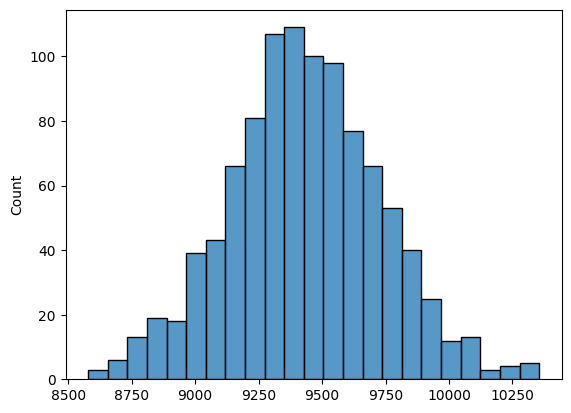

In [14]:
sns.histplot(male_sample_data)

<Axes: ylabel='Count'>

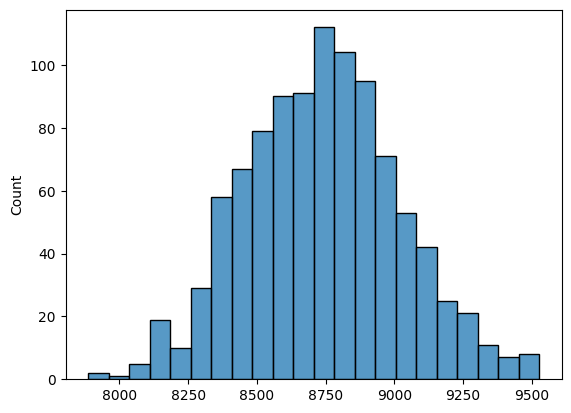

In [15]:
sns.histplot(female_sample_data)

95% confidence interval

In [16]:
male_confidence_interval95=np.percentile(male_sample_data, [2.5, 97.5])

In [17]:
print(male_confidence_interval95)

[ 8822.43666667 10008.8465    ]


In [18]:
female_confidence_interval95=np.percentile(female_sample_data, [2.5, 97.5])

In [19]:
print(female_confidence_interval95)

[8183.03541667 9305.12466667]


90% confidence interval

In [20]:
male_confidence_interval90=np.percentile(male_sample_data, [5, 95])
print(male_confidence_interval90)
female_confidence_interval90=np.percentile(female_sample_data, [5, 95])
print(female_confidence_interval90)

[8937.74266667 9922.26383333]
[8300.3065     9219.07183333]


99% confidence interval

In [21]:
male_confidence_interval99=np.percentile(male_sample_data, [0.5, 99.5])
print(male_confidence_interval99)
female_confidence_interval99=np.percentile(female_sample_data, [0.5, 99.5])
print(female_confidence_interval99)

[ 8721.06006667 10228.37113333]
[8080.81795    9474.72176667]


In [22]:
sample_size=500
female_sample_data_1=[df[df['Gender']=='F'].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]
male_sample_data_1=[df[df['Gender']=='M'].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]

In [23]:
print(female_sample_data_1)

[8433.288, 8729.082, 8630.212, 8930.71, 9271.458, 8461.358, 9125.09, 8522.59, 9040.802, 9029.434, 8659.822, 8675.782, 8909.75, 8519.774, 8663.268, 8794.784, 8758.924, 8642.564, 8838.4, 8826.436, 8420.6, 8635.322, 9136.106, 8525.328, 9006.808, 9037.444, 8691.898, 8405.136, 8524.936, 9246.744, 8886.062, 8540.51, 8925.08, 8737.684, 8649.862, 8974.934, 8753.524, 8680.158, 9003.092, 8415.408, 8616.596, 8763.616, 8756.126, 8691.736, 8189.866, 8659.838, 8875.326, 8917.34, 8985.02, 8867.988, 8913.41, 8593.496, 8685.072, 8381.846, 8745.384, 8786.714, 8559.716, 8472.038, 9063.47, 8436.796, 9183.37, 8815.242, 8381.664, 8392.756, 8650.242, 8811.822, 9043.412, 8946.11, 8975.164, 9092.156, 8948.204, 8698.982, 8766.02, 8580.832, 8636.416, 8825.502, 8886.514, 8723.718, 8696.41, 9005.3, 8788.0, 8900.852, 8653.744, 8790.698, 8425.648, 8782.736, 8782.574, 8648.232, 8578.432, 9024.124, 8777.574, 8711.932, 8659.96, 8731.988, 8391.592, 8933.612, 9010.674, 8648.04, 8822.998, 8919.8, 8588.382, 8894.244, 8465.

In [24]:
print(male_sample_data_1)

[9482.366, 9658.932, 9335.612, 9560.208, 9454.428, 9336.282, 9530.282, 9525.444, 9235.016, 9388.432, 9185.456, 9144.444, 9281.142, 9132.908, 9576.536, 9882.418, 9692.012, 9473.964, 9397.002, 9428.046, 9729.408, 9155.542, 9540.152, 9450.822, 9363.442, 9591.522, 9709.938, 9608.804, 9133.562, 9764.75, 9610.566, 8903.07, 9210.71, 8959.482, 9458.326, 10189.698, 9633.42, 9239.154, 9368.1, 9620.832, 9584.434, 9455.912, 9432.926, 9300.276, 9263.614, 9377.966, 9628.27, 9773.992, 9784.75, 9404.252, 9223.116, 9241.508, 9310.936, 9452.142, 9367.748, 9485.07, 9897.888, 9630.68, 9221.11, 9648.956, 9505.28, 9565.976, 9298.522, 9175.974, 9172.8, 9149.61, 9033.082, 9000.442, 9720.946, 9538.012, 9346.722, 9594.478, 9121.416, 9310.85, 9516.412, 9051.536, 9563.956, 9114.682, 9385.152, 9356.734, 9139.536, 9182.066, 9672.566, 9241.324, 9136.768, 9690.082, 9740.222, 9609.954, 9320.29, 9565.116, 9696.462, 9463.442, 9306.492, 9494.768, 9689.288, 9658.698, 9392.57, 9423.604, 8783.428, 9738.254, 9367.462, 9273.9

In [25]:
np.mean(female_sample_data_1)


8736.172005999999

In [26]:
np.mean(male_sample_data_1)

9434.211106

<Axes: ylabel='Count'>

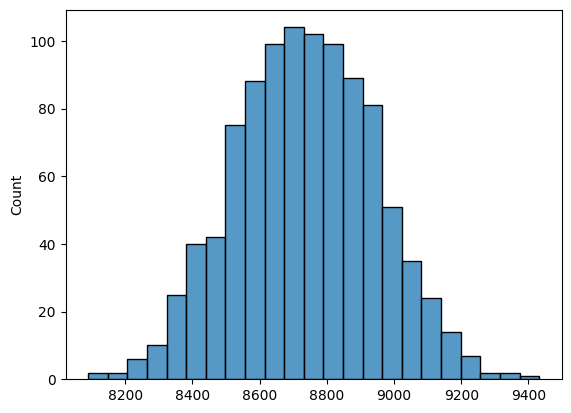

In [27]:
sns.histplot(female_sample_data_1)

<Axes: ylabel='Count'>

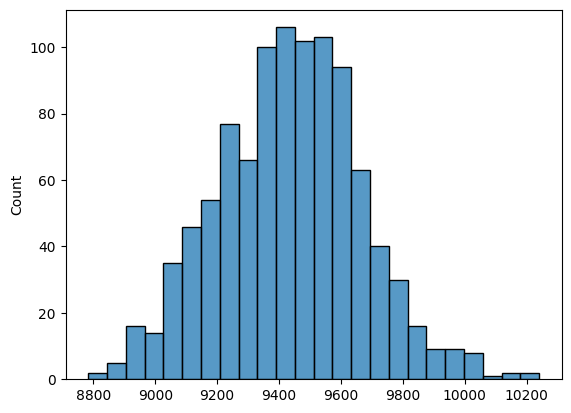

In [28]:
sns.histplot(male_sample_data_1)

95% confidence interval

In [29]:
male_confidence_interval_195=np.percentile(male_sample_data_1, [2.5, 97.5])
print('male_confidence_interval:',male_confidence_interval_195)
female_confidence_interval_195=np.percentile(female_sample_data_1, [2.5, 97.5])
print('female_confidence_interval:',female_confidence_interval_195)

male_confidence_interval: [8980.09325 9898.37255]
female_confidence_interval: [8332.7488  9140.79725]


Married vs Unmarried

In [30]:
sample_size=300
married_sample_data=[df[df['Marital_Status']==1].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]
unmarried_sample_data=[df[df['Marital_Status']==0].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]

In [31]:
print(married_sample_data)

[9327.32, 9187.173333333334, 9664.403333333334, 9413.576666666666, 8972.543333333333, 8821.103333333333, 9213.506666666666, 9959.976666666667, 9224.226666666667, 9492.386666666667, 9090.346666666666, 9197.77, 8626.833333333334, 9169.473333333333, 9406.27, 9518.66, 9656.166666666666, 9289.31, 8867.793333333333, 9301.693333333333, 9445.343333333334, 9415.553333333333, 9647.296666666667, 9076.633333333333, 8478.436666666666, 9607.693333333333, 9654.253333333334, 9196.346666666666, 9154.166666666666, 9466.776666666667, 9250.8, 9359.933333333332, 9132.633333333333, 9074.58, 9430.566666666668, 9202.85, 9147.146666666667, 9923.486666666666, 9261.453333333333, 9330.416666666666, 8827.316666666668, 10068.06, 9626.793333333333, 9562.683333333332, 9317.05, 9363.866666666667, 9343.983333333334, 8844.706666666667, 9051.803333333333, 9372.256666666666, 9590.48, 9166.84, 8885.656666666666, 9626.673333333334, 9236.956666666667, 9300.88, 9264.666666666666, 9468.156666666666, 8804.44, 9595.826666666666,

In [32]:
print(unmarried_sample_data)

[9146.29, 8972.726666666667, 9403.576666666666, 9166.12, 9345.293333333333, 9075.763333333334, 9244.346666666666, 9447.096666666666, 9006.973333333333, 9185.63, 9150.203333333333, 9520.843333333334, 9040.5, 8853.723333333333, 9303.506666666666, 9080.32, 9134.563333333334, 8705.536666666667, 9445.04, 9563.343333333334, 9009.92, 9416.38, 9432.99, 9705.363333333333, 8905.53, 9644.48, 8839.75, 9113.553333333333, 9233.69, 9237.9, 9485.68, 8836.94, 9140.34, 9833.626666666667, 9211.346666666666, 9677.696666666667, 8845.193333333333, 8838.37, 8989.843333333334, 9422.806666666667, 9243.98, 8738.183333333332, 9406.283333333333, 9763.596666666666, 9265.456666666667, 9781.543333333333, 9403.356666666667, 9441.713333333333, 9042.123333333333, 9074.873333333333, 9316.0, 9575.233333333334, 9487.57, 9426.35, 9177.073333333334, 9335.386666666667, 9585.056666666667, 9624.626666666667, 9063.39, 9204.8, 8997.94, 9171.046666666667, 8685.79, 9094.373333333333, 8902.8, 9744.346666666666, 8960.82, 8826.653333

In [33]:
np.mean(married_sample_data)

9249.789516666666

In [34]:
np.mean(unmarried_sample_data)

9254.843939999999

<Axes: ylabel='Count'>

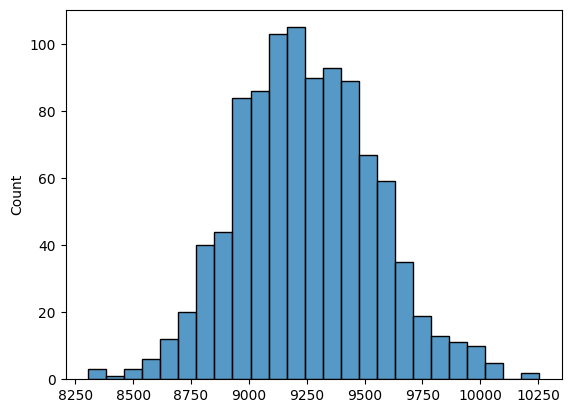

In [35]:
sns.histplot(married_sample_data)

<Axes: ylabel='Count'>

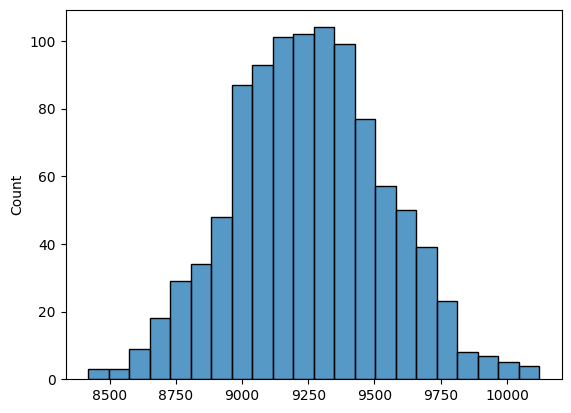

In [36]:
sns.histplot(unmarried_sample_data)

95% confidence interval

In [37]:
married_confidence_interval95=np.percentile(married_sample_data,[2.5,97.5])
unmarried_confidence_interval95=np.percentile(unmarried_sample_data,[2.5,97.5])

In [38]:
print('married_confidence_interval95:',married_confidence_interval95)
print('unmarried_confidence_interval95:',unmarried_confidence_interval95)

married_confidence_interval95: [8699.32441667 9883.68675   ]
unmarried_confidence_interval95: [8706.96991667 9808.839     ]


90% confidence interval

In [39]:
married_confidence_interval90=np.percentile(married_sample_data,[5,95])
unmarried_confidence_interval90=np.percentile(unmarried_sample_data,[5,95])
print('married_confidence_interval90:',married_confidence_interval90)
print('unmarried_confidence_interval90:',unmarried_confidence_interval90)

married_confidence_interval90: [8792.174      9741.79683333]
unmarried_confidence_interval90: [8782.57066667 9719.991     ]


99% confidence interval

In [40]:
married_confidence_interval99=np.percentile(married_sample_data,[0.5,99.5])
unmarried_confidence_interval99=np.percentile(unmarried_sample_data,[0.5,99.5])
print('married_confidence_interval99:',married_confidence_interval99)
print('unmarried_confidence_interval99:',unmarried_confidence_interval99)

married_confidence_interval99: [ 8478.3746     10062.97133333]
unmarried_confidence_interval99: [8572.67205 9995.2201 ]


Sample size 500

In [41]:
sample_size=500
married_sample_data_1=[df[df['Marital_Status']==1].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]
unmarried_sample_data_1=[df[df['Marital_Status']==0].sample(sample_size,replace=True)['Purchase'].mean() for i in range(1000)]

In [42]:
print(married_sample_data_1)

[9009.136, 9252.092, 9563.062, 9440.516, 9220.252, 9333.252, 9671.25, 9085.408, 9497.366, 9406.534, 9035.318, 9054.244, 9185.276, 8435.768, 9388.246, 9290.004, 9235.626, 9320.694, 9181.608, 9066.156, 9562.678, 9366.794, 9157.014, 9350.102, 9290.876, 9152.6, 9485.854, 9283.078, 9477.532, 9161.766, 8681.672, 9189.788, 9091.114, 9323.84, 9106.912, 9597.358, 9128.854, 9558.38, 9288.81, 8318.158, 9183.386, 9055.476, 8962.226, 9197.262, 9199.056, 9328.044, 9070.854, 9058.644, 9782.986, 9367.062, 9158.22, 9424.986, 9329.05, 9182.11, 8926.982, 9336.592, 9332.856, 9859.746, 9508.038, 8941.06, 9169.212, 9132.546, 9530.754, 9296.358, 9174.07, 8969.376, 9330.906, 9309.392, 9055.898, 9267.338, 9576.636, 9537.444, 9321.166, 9280.78, 8961.642, 9631.018, 9035.464, 9458.858, 9714.25, 9171.58, 9568.216, 9170.926, 8931.978, 9510.118, 9481.778, 9111.844, 9282.548, 8774.198, 9380.1, 9085.162, 9248.36, 9135.992, 9042.522, 9216.176, 9777.43, 9235.968, 9571.552, 9021.94, 9388.058, 9128.35, 9077.65, 9061.378, 

In [43]:
print(unmarried_sample_data_1)

[9215.764, 9226.338, 9043.104, 9492.746, 9418.648, 9251.956, 9215.62, 9427.818, 9246.498, 9323.684, 9473.802, 9191.422, 9025.894, 9335.742, 9533.694, 8874.252, 8957.688, 9369.188, 9206.454, 9274.884, 9401.696, 9213.622, 9287.832, 9518.376, 9412.372, 9244.48, 9376.602, 9307.596, 9222.244, 9249.636, 9483.316, 9171.602, 8924.196, 9381.012, 9136.214, 9436.196, 9809.078, 9307.368, 8935.586, 9309.336, 9302.63, 9095.896, 9364.438, 8940.572, 9124.364, 9281.934, 9319.986, 9372.668, 9370.638, 9497.276, 9534.62, 9219.026, 9338.202, 9584.632, 8545.454, 9101.456, 9089.688, 9328.136, 8840.008, 9167.508, 9329.618, 9111.016, 9131.188, 9104.918, 9175.432, 9401.582, 9083.378, 9413.07, 9136.22, 9618.19, 9352.5, 9032.496, 9393.308, 9161.686, 9390.304, 9203.86, 9239.848, 9324.674, 9341.222, 9272.184, 8993.824, 9005.224, 9161.824, 9303.38, 9181.702, 9369.144, 9333.884, 9642.99, 9284.91, 9058.402, 9162.262, 9542.164, 9115.18, 9437.292, 9016.828, 9000.808, 9173.014, 9086.756, 9296.886, 9389.716, 9102.772, 940

In [44]:
np.mean(married_sample_data_1)

9269.543832000001

In [45]:
np.mean(unmarried_sample_data_1)

9268.236752

<Axes: ylabel='Count'>

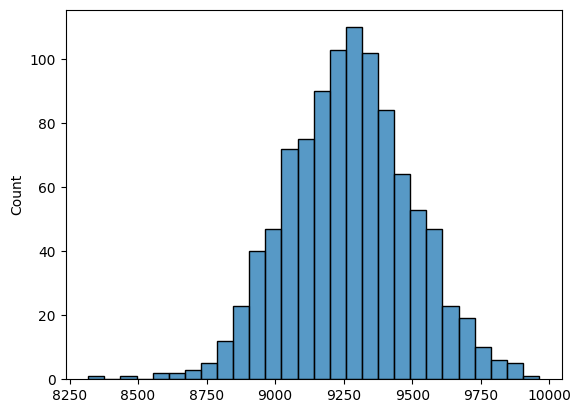

In [46]:
sns.histplot(married_sample_data_1)

<Axes: ylabel='Count'>

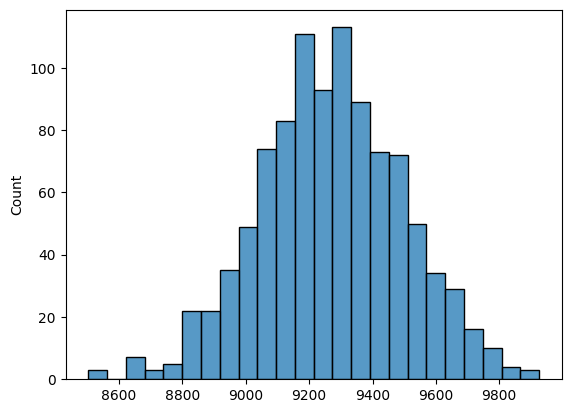

In [47]:
sns.histplot(unmarried_sample_data_1)

95% confidence interval

In [48]:
married_confidence_interval_195=np.percentile(married_sample_data_1,[2.5,97.5])
unmarried_confidence_interval_195=np.percentile(unmarried_sample_data_1,[2.5,97.5])

In [49]:
print(married_confidence_interval_195)
print(unmarried_confidence_interval_195)

[8830.54295 9714.31085]
[8830.60795 9717.76385]


Age

In [55]:
sample_size=300
age_labels=['0-17', '18-25', '26-35', '36-50', '51+']
df['AgeGroup'] = pd.cut(df['Age'],labels=age_labels, right=False)


TypeError: ignored